<a href="https://colab.research.google.com/github/AHamamd150/Zewail-city/blob/main/DNN_MNIST_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os # To use the system comands in python
import matplotlib.pyplot as plt # plotting library
import numpy as np  #Numerical python liberary
import pandas as pd #Data handeling python module 
plt.style.use('seaborn')

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

Four files are available on this site:

* train-images-idx3-ubyte.gz:  training set images (9912422 bytes)
* train-labels-idx1-ubyte.gz:  training set labels (28881 bytes)
* t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes)
* t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)



# Load the data from keras 

In [2]:
from tensorflow import keras
from keras.datasets import mnist
data = mnist.load_data()

# Split the data into traning and test samples

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

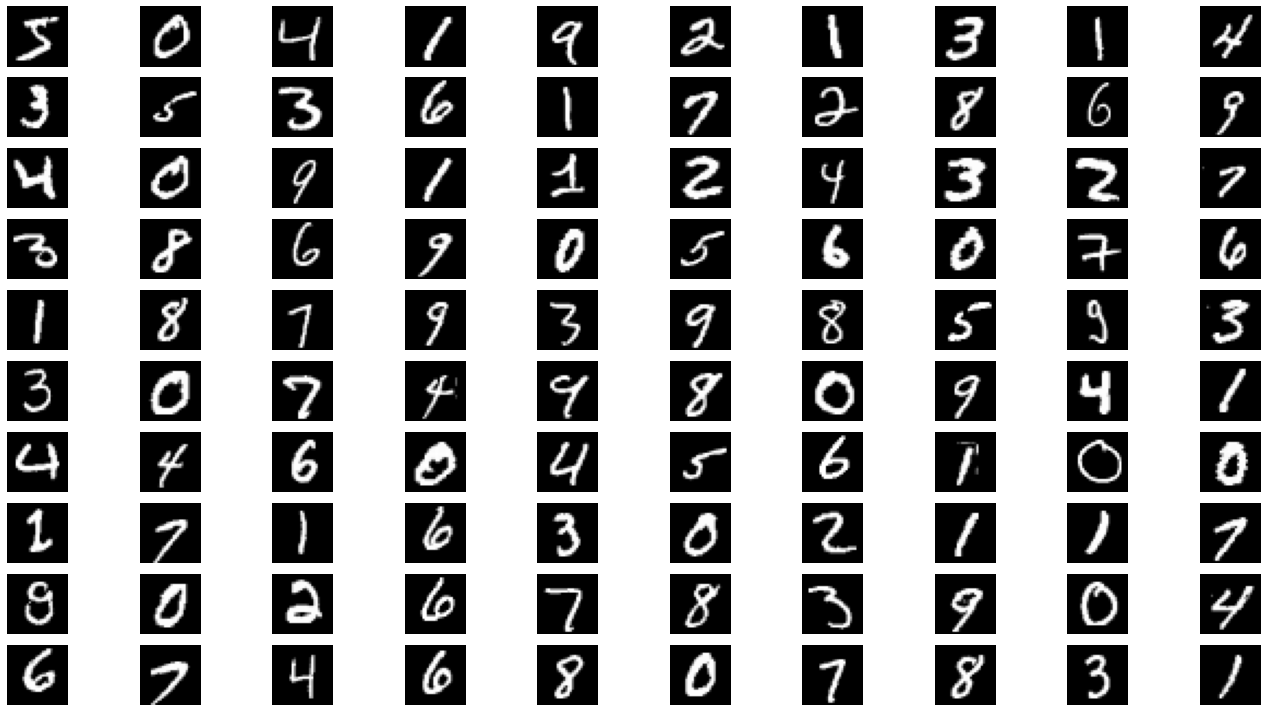

In [ ]:
fig = plt.figure(figsize=(20,10))
for q in range(100):
  fig.add_subplot(10,10,q+1)
  plt.imshow(x_train[q],cmap='gray');
  plt.axis('off')
  plt.tight_layout()
  

# Check the shapes of the data

In [ ]:
print('train sample shape= ',x_train.shape,'and test sample shape= ',x_test.shape)
print('train label shape= ',y_train.shape,'\t and test label shape= ',y_test.shape)

train sample shape=  (60000, 28, 28) and test sample shape=  (10000, 28, 28)
train label shape=  (60000,) 	 and test label shape=  (10000,)


In [ ]:
print('Maximum Value of the image= {} and Minimum value of the image= {}'.format(x_train.max(),x_train.min()))

Maximum Value of the image= 255 and Minimum value of the image= 0


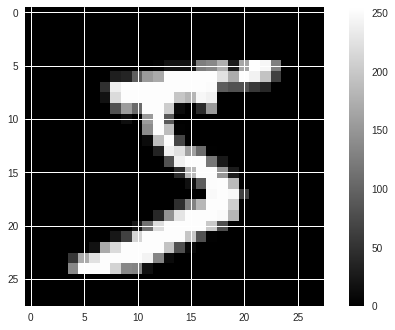

In [ ]:
plt.imshow(x_train[0],cmap='gray');
plt.colorbar();

# Let us normalize all images to have values between 0 and 1

In [4]:
x_train=x_train.reshape(-1,28,28,1)/255;
x_test=x_test.reshape(-1,28,28,1)/255;

In [ ]:
print('Maximum Value of the image= {} and Minimum value of the image= {}'.format(x_train.max(),x_train.min()))

Maximum Value of the image= 1.0 and Minimum value of the image= 0.0


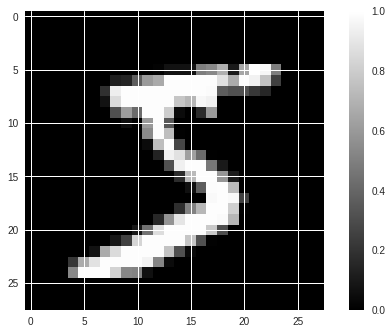

In [ ]:
plt.imshow(x_train[0].reshape(28,28),cmap='gray');
plt.colorbar();

# Pingo Let us handel the labels 


In [ ]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

# We need to reshape the lables to have 10 collumns, One-hot encoding

In [5]:
y_train1=keras.utils.to_categorical(y_train,10)
y_test1=keras.utils.to_categorical(y_test,10)

In [7]:
tt=pd.DataFrame(y_train1)
tt['label']=y_train
tt.head(10)

,0,1,2,3,4,5,6,7,8,9,label
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
from tensorflow import keras
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28,1)),
keras.layers.Dense(512,activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(265,activation='relu'),
keras.layers.Dropout(0.3),
keras.layers.Dense(128,activation='relu'),                         
keras.layers.Dropout(0.2),
keras.layers.Dense(10,activation='softmax') # 10 neurons for the 10 digits and Softmax because off the multiclass calssification
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 265)               135945    
                                                                 
 dropout_13 (Dropout)        (None, 265)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               34048     
                                                                 
 dropout_14 (Dropout)        (None, 128)              

# Compile the model 

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='CategoricalCrossentropy',metrics=['accuracy'])

# Fit the training data to their true labels


In [ ]:
history = model.fit(x_train,y_train1,epochs=20,batch_size=1000,validation_split=0.2)


Epoch 1/20
48/48 [==============================] - 1s 14ms/step - loss: 0.6818 - accuracy: 0.7925 - val_loss: 0.1793 - val_accuracy: 0.9477
Epoch 2/20
48/48 [==============================] - 0s 10ms/step - loss: 0.1929 - accuracy: 0.9452 - val_loss: 0.1341 - val_accuracy: 0.9609
Epoch 3/20
48/48 [==============================] - 0s 10ms/step - loss: 0.1450 - accuracy: 0.9571 - val_loss: 0.1145 - val_accuracy: 0.9657
Epoch 4/20
48/48 [==============================] - 0s 10ms/step - loss: 0.1229 - accuracy: 0.9645 - val_loss: 0.1096 - val_accuracy: 0.9675
Epoch 5/20
48/48 [==============================] - 0s 10ms/step - loss: 0.1055 - accuracy: 0.9685 - val_loss: 0.0985 - val_accuracy: 0.9715
Epoch 6/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0929 - accuracy: 0.9724 - val_loss: 0.0997 - val_accuracy: 0.9716
Epoch 7/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0871 - accuracy: 0.9737 - val_loss: 0.0916 - val_accuracy: 0.9740
Epoch 8/20
48

In [ ]:
scores = model.evaluate(x_test, y_test1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.90%


# Plot the accuracy and the Loss 

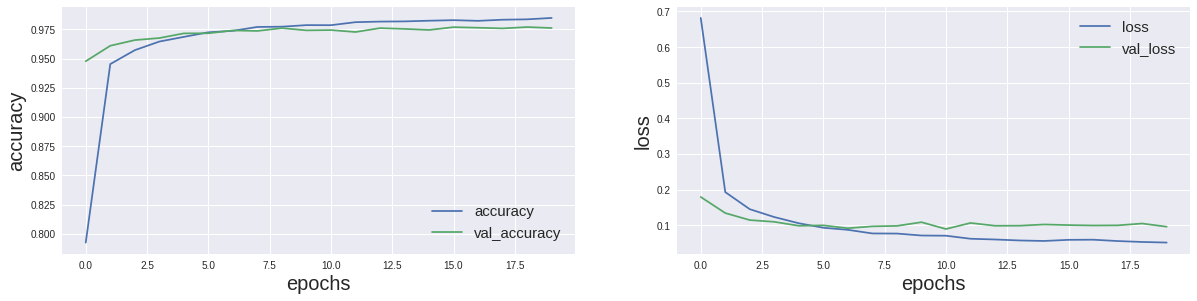

In [ ]:
fig=plt.figure(figsize=(18,10))
fig.add_subplot(2,2,1)
plt.plot(history.history['accuracy'],label='accuracy');
plt.plot(history.history['val_accuracy'],label='val_accuracy');
plt.xlabel('epochs',fontsize=20);
plt.ylabel('accuracy',fontsize=20);
plt.legend(loc='best',fontsize=15);
fig.add_subplot(2,2,2)
plt.plot(history.history['loss'],label='loss');
plt.plot(history.history['val_loss'],label='val_loss');
plt.xlabel('epochs',fontsize=20);
plt.ylabel('loss',fontsize=20);
plt.legend(loc='best',fontsize=15);

# Let's make predictions 

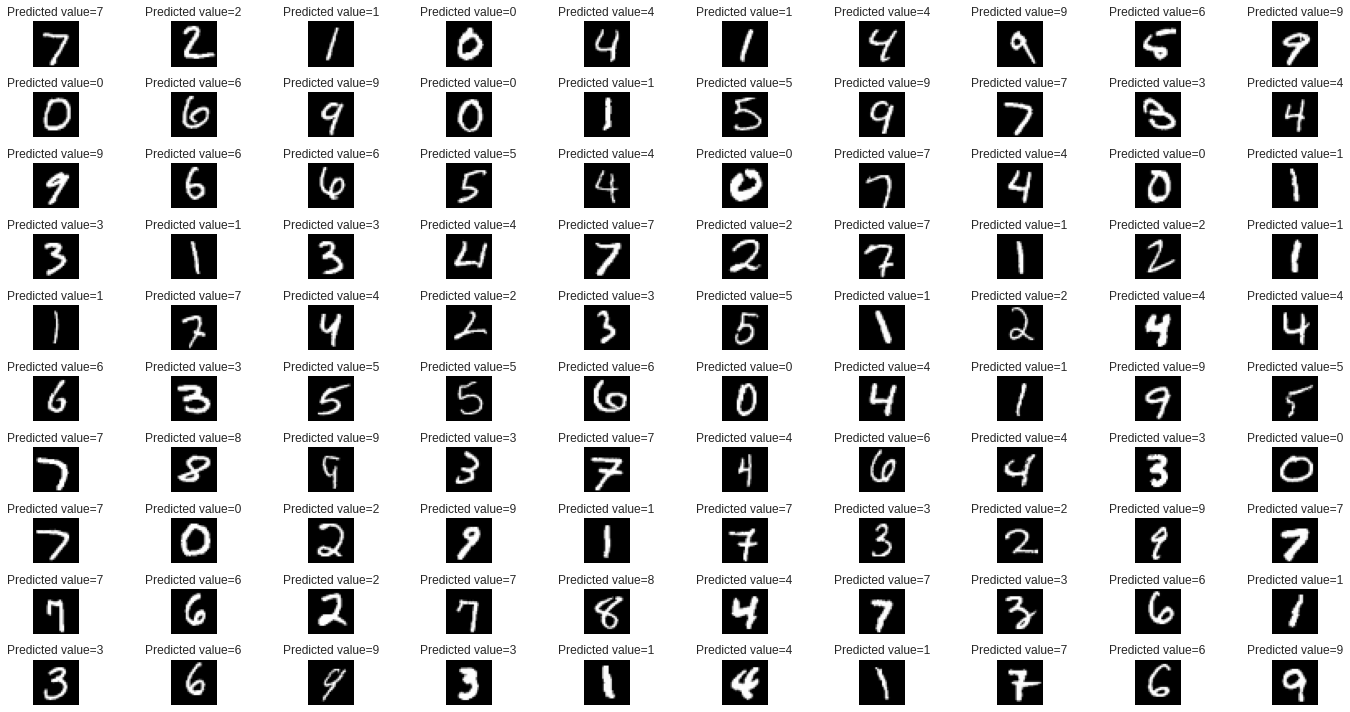

In [ ]:
fig = plt.figure(figsize=(20,10))
for q in range(100):
  fig.add_subplot(10,10,q+1)
  plt.imshow(x_test[q].reshape(28,28),cmap='gray');
  plt.axis('off')
  pred=model.predict(x_test[q].reshape(-1,28,28,1)).argsort()
  plt.title('Predicted value={}'.format(pred.ravel()[-1]))
  plt.tight_layout();
  